### 共通して使う関数
(https://qiita.com/keimoriyama/items/9d534802affc8b437a1b)

In [1]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y,classifier,test_idx,resolution = 0.02):
    #マーカーとカラーマップの用意
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #決定領域のプロット
    x1_min,x1_max = X[:,0].min() - 1,X[:,0].max() + 1
    x2_min,x2_max = X[:,1].min() - 1,X[:,1].max() + 1
    #グリッドポイントの作成
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                         np.arange(x2_min,x2_max,resolution))
    #特徴量を一次元配列に変換して予測を実行する
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    #予測結果をグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    #グリッドポイントの等高線のプロット
    plt.contourf(xx1,xx2,Z,alpha = 0.4,cmap = cmap)
    #軸の範囲の設定
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    #クラスごとにサンプルをプロット
    #matplotlibが1.5.0以下ならc = cmapをc=colors[idx]に変更
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y == cl,1],alpha=0.8,c = cmap(idx),marker=markers[idx],label=cl)
    #テストサンプルを目立たせる
    if test_idx:
        X_test,y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c='',alpha = 1,linewidths=1,marker='o',s = 55,label = 'test set')

### データセットの入手とデータの標準化

In [2]:
from sklearn import datasets
import numpy as np
#データセットのロード
iris = datasets.load_iris()
#3,4列目の特徴量の抽出
X = iris.data[:,[2,3]]
#クラスラベルの取得
y = iris.target
from sklearn.model_selection import train_test_split
#トレーニングデータとテストデータに分割
#全体の30%をテストデータとする
X_train,X_test,y_train,y_test = train_test_split(
                                X,y,test_size=0.3,random_state = 0)
from sklearn.preprocessing import StandardScaler
#インスタンス変数の作成
sc = StandardScaler()
#トレーニングデータの平均と標準偏差を計算
sc.fit(X_train)
# 平均と標準偏差を用いて標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#トレーニングデータとテストデータの特徴量を行方向に結合
X_combined_std = np.vstack((X_train_std,X_test_std))
#トレーニングデータとテストデータのラベルを結合
y_combined = np.hstack((y_train,y_test))

### ロジスティック回帰を使って分けてみる

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


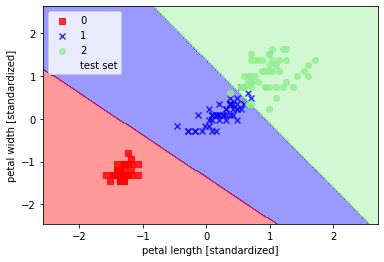

In [3]:
from sklearn.linear_model import LogisticRegression
#インスタンスの作成
lr = LogisticRegression(C=1000.0,random_state=0)
#モデルに適合させる
lr.fit(X_train_std,y_train)
#決定境界のプロット
plot_decision_regions(X_combined_std,y_combined,classifier=lr,test_idx=range(105,150))
#軸ラベルの設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
#凡例の設定
plt.legend(loc = 'upper left')
plt.show()

### SVMを使って分対してみる

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


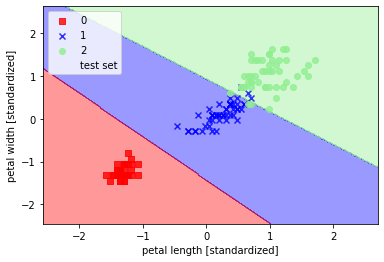

In [4]:
from sklearn.svm import SVC
#インスタンスの作成
svm = SVC(kernel='linear',C=1.0,random_state=0)
#モデルに適合させる
svm.fit(X_train_std,y_train)
#決定境界のプロット
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
#軸ラベルの設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
#凡例の設定
plt.legend(loc = 'upper left')
plt.show()